In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index=pd.read_csv('economic_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [9]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [10]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

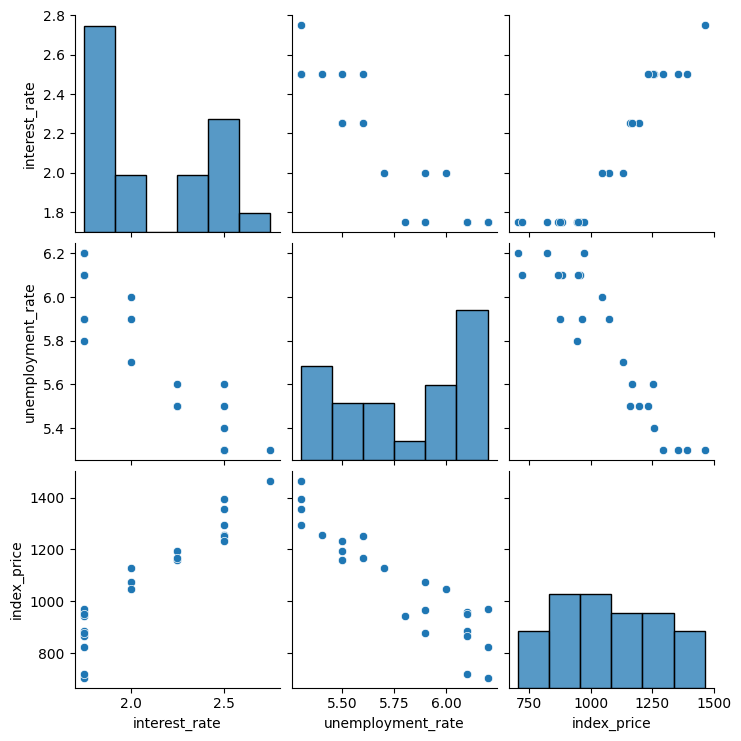

In [12]:
## Visualisation
import seaborn as sns
sns.pairplot(df_index)

In [13]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployement Rate')

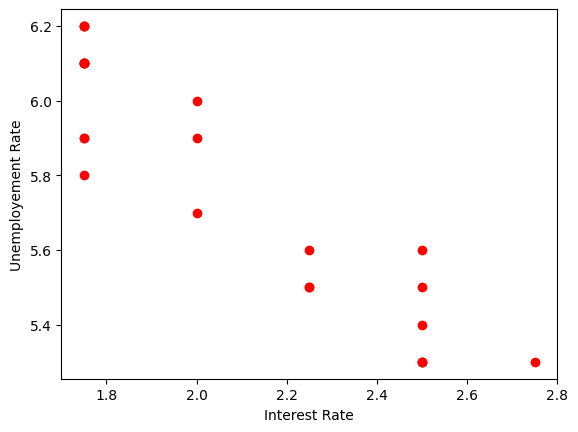

In [15]:
## visualise data points more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployement Rate")

In [17]:
## Independent and dependednt features
X=df_index.iloc[:,:-1] #everything except last
y=df_index.iloc[:,-1]

In [18]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [19]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [20]:
## train test split
from sklearn.model_selection import train_test_split

In [21]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='index_price'>

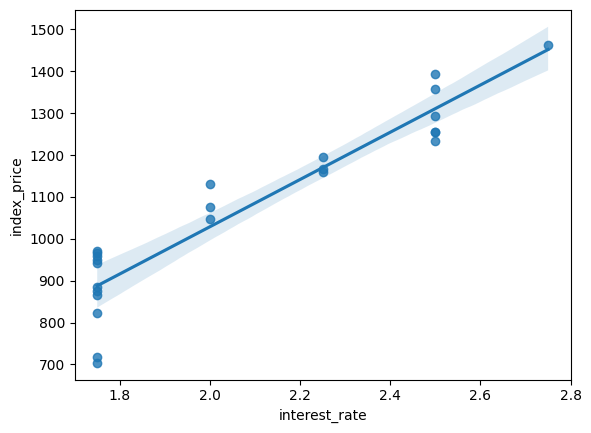

In [28]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

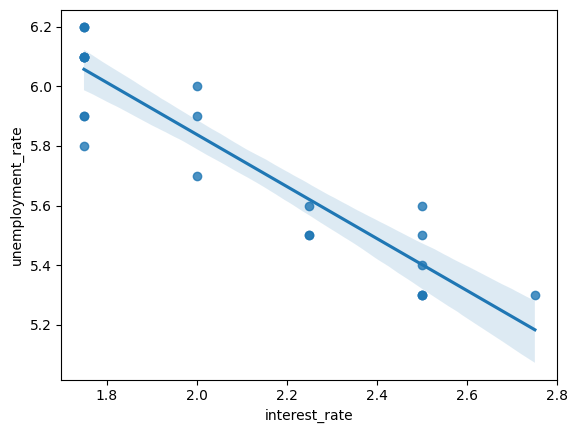

In [30]:

sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [34]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
##cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)#cv means kitne part me train aur validation ko divide karke karna he kitni baar me 

In [36]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [37]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [38]:
##Prediction 
y_pred=regression.predict(X_test)

In [39]:
## performance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


5793.762887712569
59.935781523235484
76.11677139574805


In [40]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.8278978091457145

In [41]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


0.7131630152428576

## Assumptions


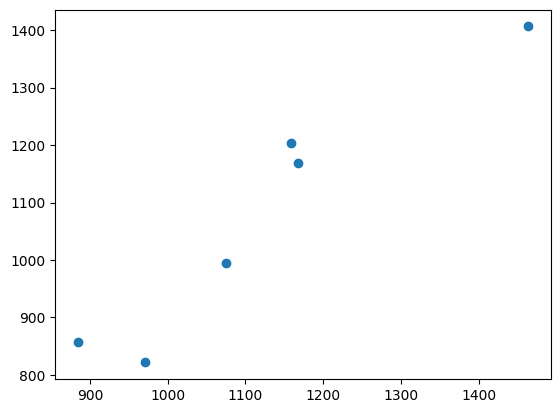

In [ ]:
plt.scatter(y_test,y_pred) # Better if linear

In [43]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


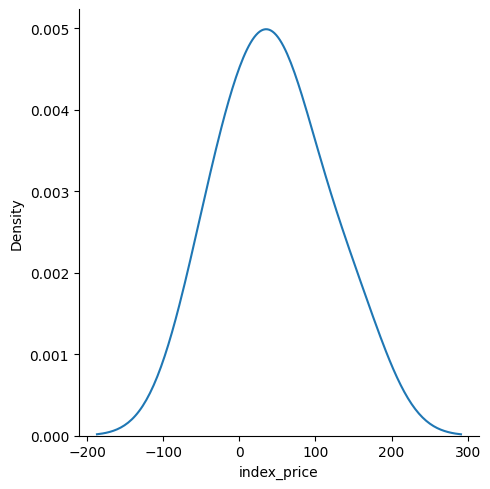

In [ ]:
## plot residuals
sns.displot(residuals,kind='kde') ## if normal distribution then model is good

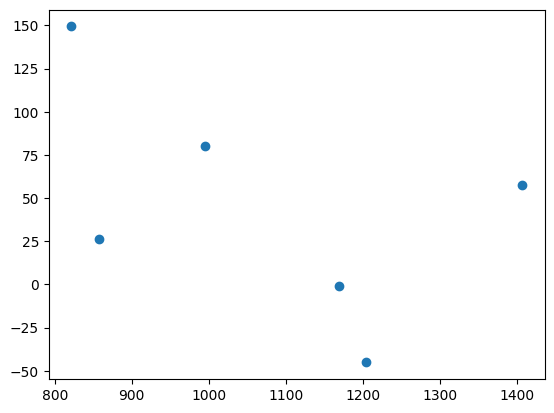

In [ ]:
# Scatter plot with residuals and predictions
plt.scatter(y_pred,residuals) ## if uniformly distibuted then it is good

In [46]:
##OLS Linear Regression
import statsmodels.api as sm

In [47]:
model = sm.OLS(y_train,X_train).fit()

In [48]:
prediction=model.predict(X_test)

In [49]:
prediction

array([ 150.78325954, -231.79392541,  353.06855924, -195.73554836,
        -58.53452146,  114.72488249])

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 19 Jul 2025   Prob (F-statistic):                       0.754
Time:                        23:15:48   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""